In [1]:

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
#usamos pandas para leer archivos csv
import pandas as pd
# Librerias para graficación (trazado de gráficos)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Leer los datos
data = pd.read_csv('/content/drive/MyDrive/laboratorios_IA/primerParcial/segundo ejercicio/kc_house_data.csv')



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
def linear_regression(X, y):
    # Añadir una columna de unos a la matriz X para tener en cuenta el término de sesgo (intercept)
    X_b = np.c_[np.ones((len(X), 1)), X]

    # Calcular el vector de parámetros theta usando la ecuación normal
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return theta

def predict(X, theta):
    # Añadir una columna de unos a la matriz X para tener en cuenta el término de sesgo (intercept)
    X_b = np.c_[np.ones((len(X), 1)), X]

    # Calcular las predicciones
    y_pred = X_b.dot(theta)

    return y_pred


In [6]:
# Seleccionar la columna 'sqft_living' como la característica (variable independiente)
X = data[['sqft_living']].values

# Seleccionar la columna 'price' como la variable objetivo (variable dependiente)
y = data['price'].values


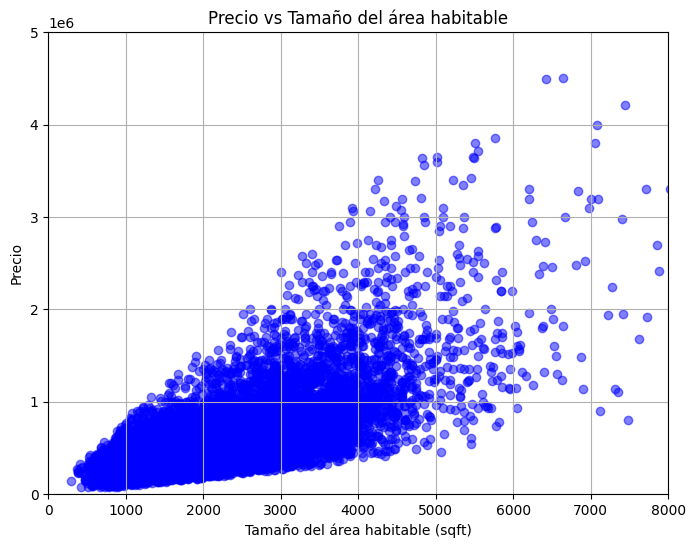

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data['sqft_living'], data['price'], color='blue', alpha=0.5)
plt.title('Precio vs Tamaño del área habitable')
plt.xlabel('Tamaño del área habitable (sqft)')
plt.ylabel('Precio')
plt.grid(True)

# Ajustar límites de los ejes
plt.xlim(0, 8000)  # Ajustar límite x
plt.ylim(0, 5000000)  # Ajustar límite y

plt.show()

In [8]:
# Calcular los parámetros theta del modelo de regresión lineal
theta = linear_regression(X, y)


In [9]:
# Hacer predicciones sobre los datos de entrenamiento
y_pred = predict(X, theta)

In [10]:
# Calcular el error cuadrático medio
mse = np.mean((y_pred - y) ** 2)

print('Parámetros theta:', theta)
print('Error cuadrático medio:', mse)

Parámetros theta: [-43580.74309447    280.6235679 ]
Error cuadrático medio: 68351286833.039825


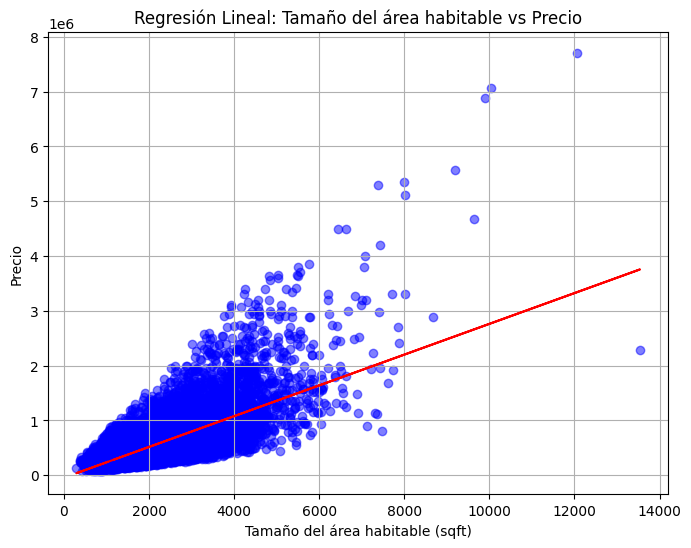

In [11]:
import matplotlib.pyplot as plt

# Graficar los datos originales y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)  # Datos originales
plt.plot(X, y_pred, color='red')  # Línea de regresión
plt.title('Regresión Lineal: Tamaño del área habitable vs Precio')
plt.xlabel('Tamaño del área habitable (sqft)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:


# Definir los datos de entrada X
X = np.array([
    [1, 3, 1.00, 1180, 5650, 1.0, 0, 0, 3, 7, 1180, 0, 1955, 0, 98178, 47.5112, -122.257, 1340, 5650],
    [1, 3, 2.25, 2570, 7242, 2.0, 0, 0, 3, 7, 2170, 400, 1951, 1991, 98125, 47.7210, -122.319, 1690, 7639],
    # Aquí se agregarían más filas con los datos restantes
])

# Definir las etiquetas y
y = np.array([221900, 538000, 180000, 604000, 510000, 1225000000, 257500, 291850, 229500, 323000, 662500, 468000, 310000, 400000, 530000, 650000, 395000, 485000, 189000, 230000, 385000, 2000000, 285000, 252700, 329000, 233000, 937000, 667000, 438000])

# Definir los parámetros theta
theta = np.zeros(X.shape[1])

# Calcular el costo utilizando la función computeCost
cost = computeCost(X, y, theta)

print("Costo:", cost)
